In [175]:
!pip install -r ../requirements.txt

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle

[notice] A new release of pip available: 22.1.2 -> 22.2.1
[notice] To update, run: pip install --upgrade pip


In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score


In [177]:
df_raw = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/random-forest-project-tutorial/main/titanic_train.csv")

In [178]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [179]:
df_raw.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S
216,217,1,3,"Honkanen, Miss. Eliina",female,27.0,0,0,STON/O2. 3101283,7.9250,NaN,S
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9000,NaN,S
524,525,0,3,"Kassem, Mr. Fared",male,NaN,0,0,2700,7.2292,NaN,C
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q
89,90,0,3,"Celotti, Mr. Francesco",male,24.0,0,0,343275,8.0500,NaN,S
420,421,0,3,"Gheorgheff, Mr. Stanio",male,NaN,0,0,349254,7.8958,NaN,C
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,NaN,S


In [180]:
df_raw.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [181]:
df_raw.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [182]:
df_raw['PassengerId'].duplicated().any()

False

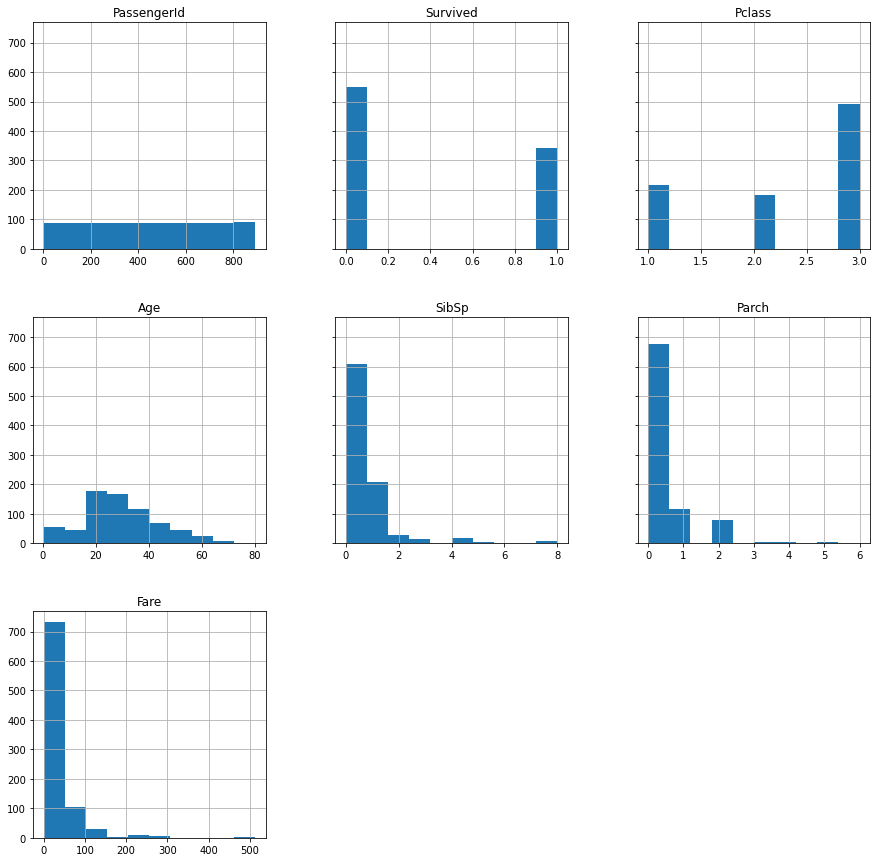

In [183]:
df_raw.hist(figsize=(15,15), sharey=True)
plt.show()

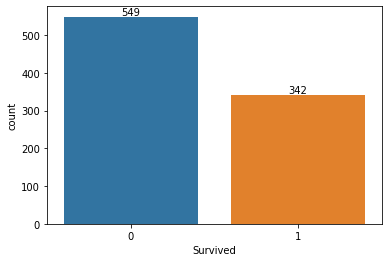

In [184]:
ax = sns.countplot(data = df_raw , x='Survived')
ax.bar_label(ax.containers[0])
plt.show()

In [185]:
#The target variable is not perfectly balanced but we can work with it

<AxesSubplot:xlabel='Sex', ylabel='count'>

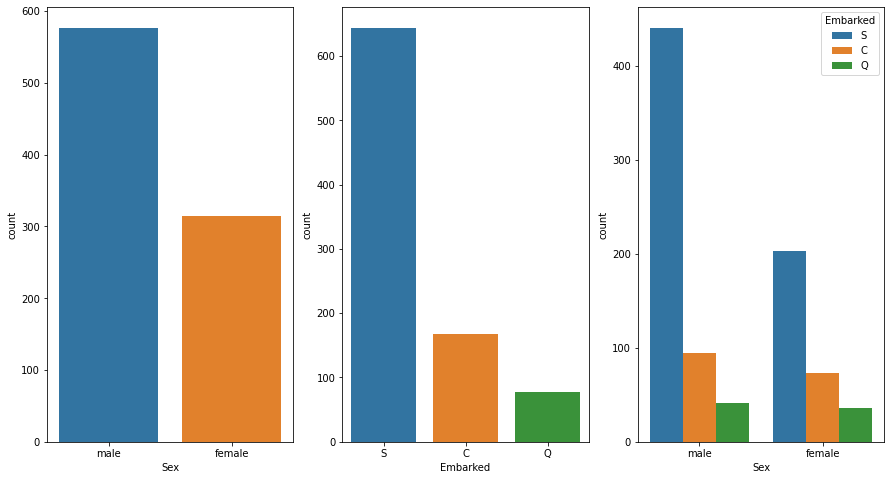

In [186]:
fig, axes = plt.subplots(1,3,figsize=(15,8))

sns.countplot(data=df_raw, x='Sex', ax = axes[0])
sns.countplot(data=df_raw, x='Embarked', ax = axes[1])
sns.countplot(data=df_raw, x='Sex', hue='Embarked', ax = axes[2])


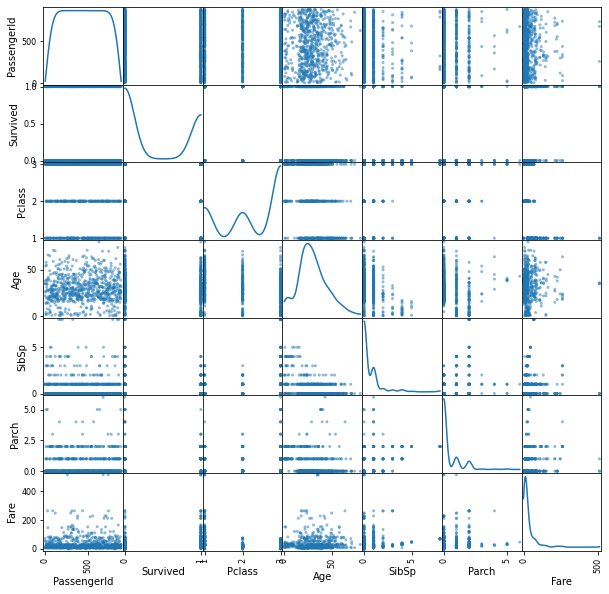

In [187]:
pd.plotting.scatter_matrix(df_raw, diagonal='kde', figsize=(10,10))
plt.show()

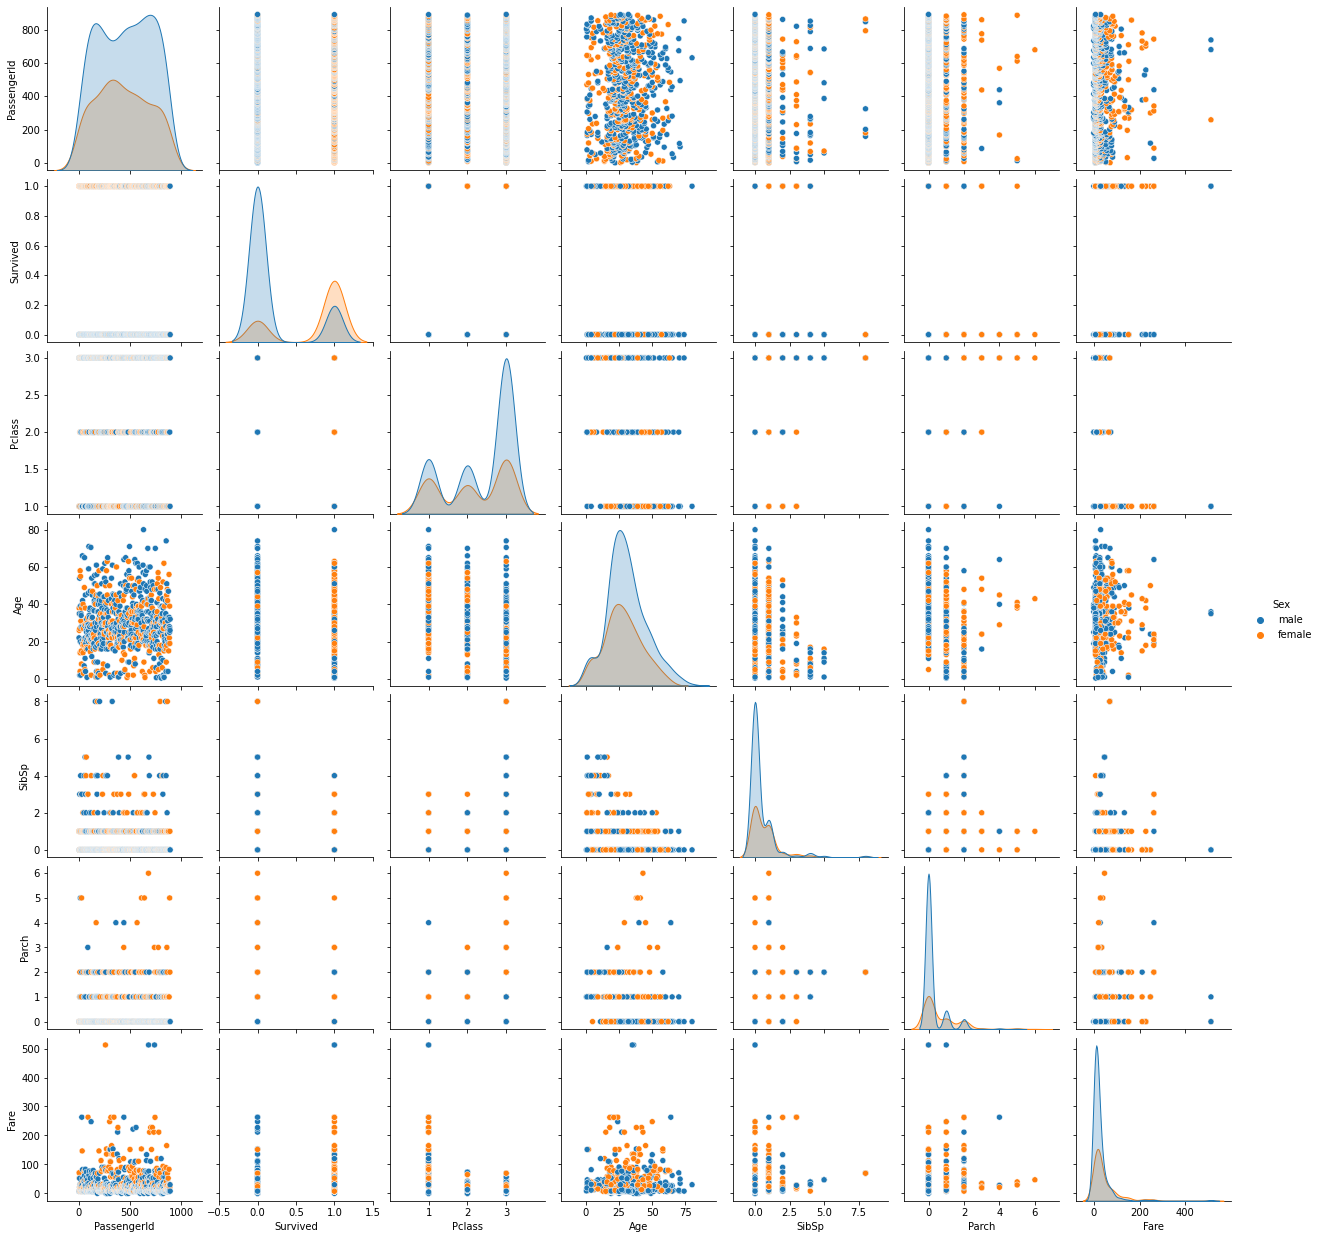

In [188]:
sns.pairplot(data=df_raw, hue='Sex')
plt.show()

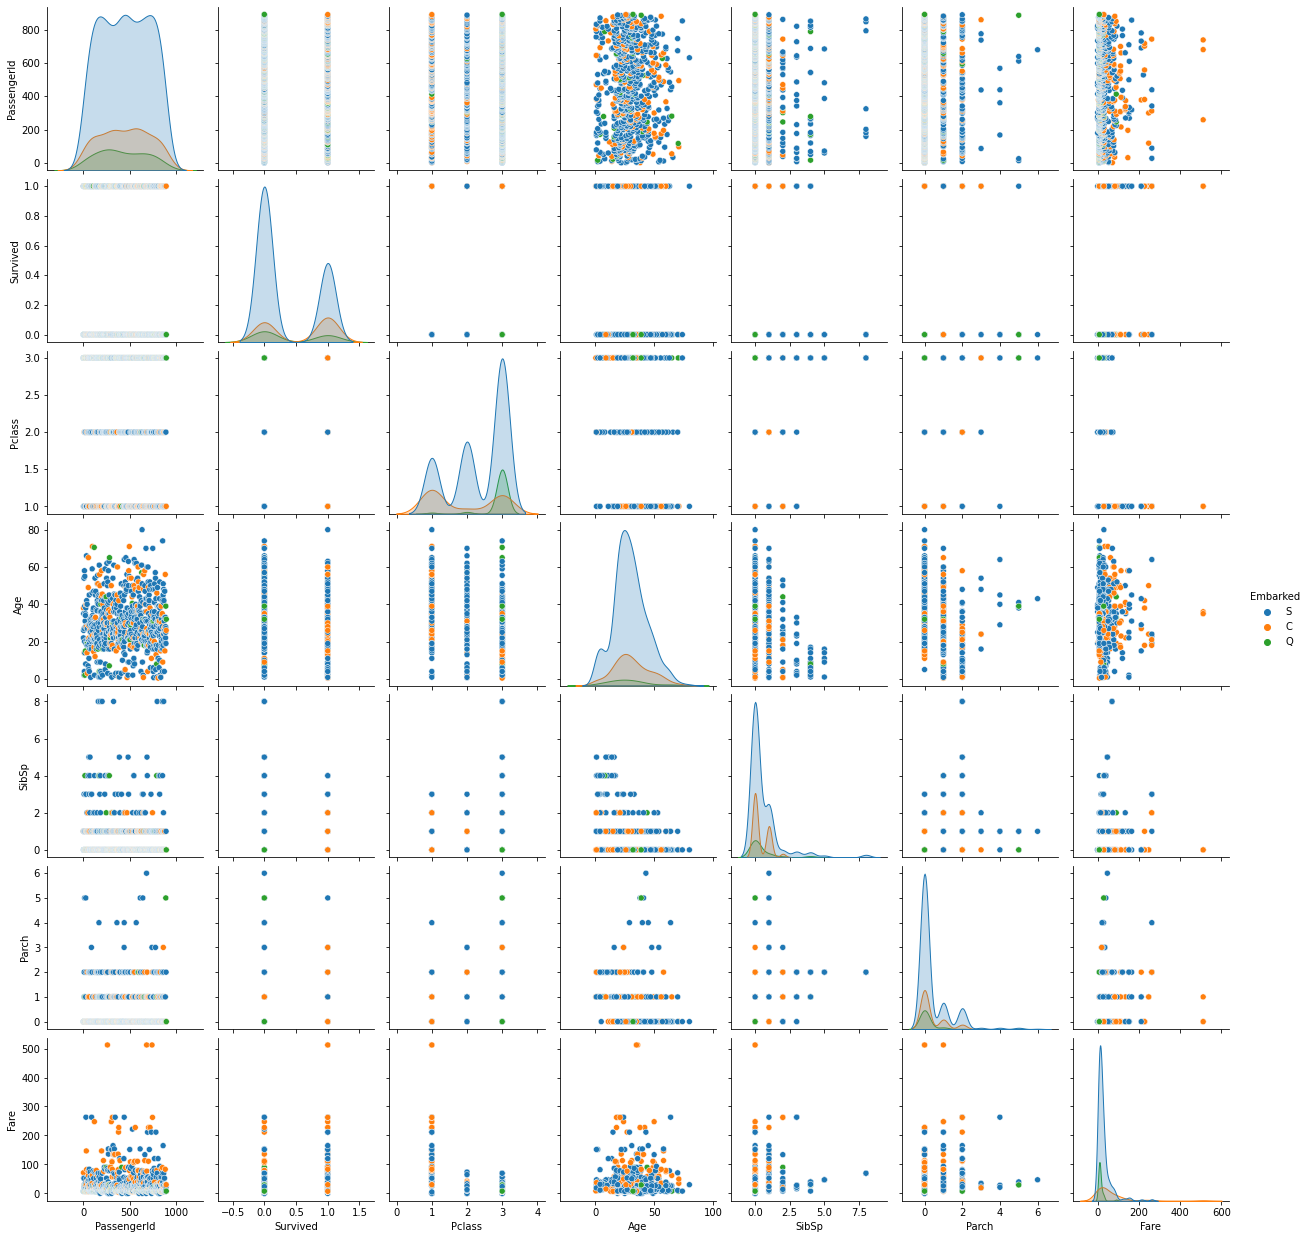

In [189]:
sns.pairplot(data=df_raw, hue='Embarked')
plt.show()

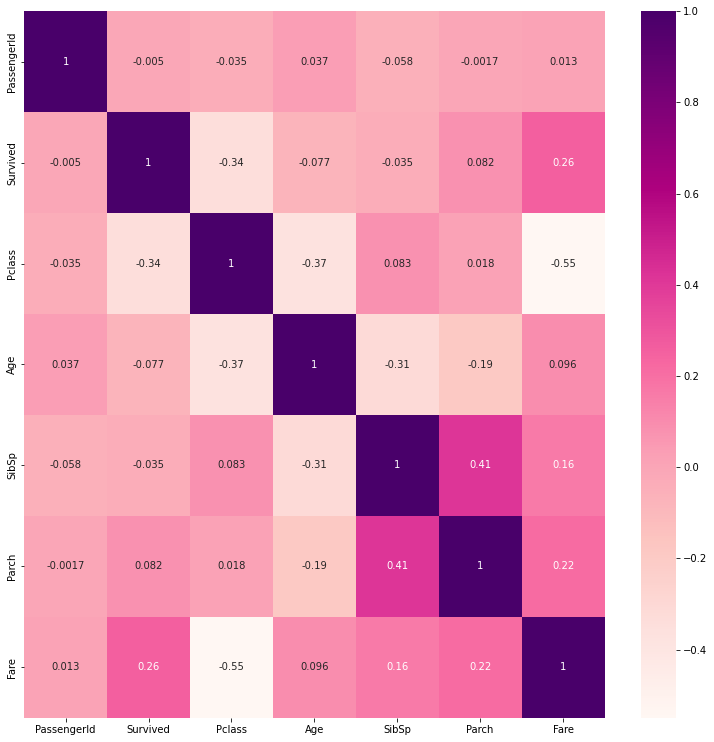

In [190]:
fig, ax = plt.subplots(figsize=(13,13))
sns.heatmap(df_raw.corr(),annot=True, cmap="RdPu", ax=ax)
plt.show()

In [191]:
#Drop Cabin column, a lot of missing values
#Also drop PassengerId, Ticket and Name because these columns do not have important data for predicting the outcome

df_raw = df_raw.drop(columns = ['Cabin','PassengerId','Name','Ticket'])


In [192]:
#Replace missing values in Age with the mean

mean_age = df_raw['Age'].describe()['mean']
df_raw['Age'] = df_raw['Age'].apply(lambda x: mean_age if np.isnan(x) else x)

In [193]:
df_raw['Age'].isnull().any()

False

In [194]:
#Replace missing values in Embarked with most frequent value

print(df_raw[df_raw["Embarked"].isnull() == True])
print('The indexs that have nan value in the Embarked column are 61 and 829')

     Survived  Pclass     Sex   Age  SibSp  Parch  Fare Embarked
61          1       1  female  38.0      0      0  80.0      NaN
829         1       1  female  62.0      0      0  80.0      NaN
The indexs that have nan value in the Embarked column are 61 and 829


In [195]:
most_freq = df_raw['Embarked'].describe()['top']

df_raw.loc[df_raw["Embarked"].isnull(),'Embarked'] = most_freq

In [196]:
df_raw[['Sex','Embarked']]=df_raw[['Sex','Embarked']].astype('category')

In [197]:
df_raw['Sex'] = df_raw['Sex'].cat.codes
df_raw['Embarked'] = df_raw['Embarked'].cat.codes

In [198]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int8   
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int8   
dtypes: float64(2), int64(4), int8(2)
memory usage: 43.6 KB


In [199]:
df_processed = df_raw.copy()
df_processed.to_csv('../data/processed/df_processed.csv')

## Random Forest

In [200]:
df = df_processed.copy()

X = df.drop(columns = ['Survived']).copy()
y = df['Survived']

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [202]:
clf = RandomForestClassifier(random_state=42)

In [203]:
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [204]:
y_pred = clf.predict(X_test)

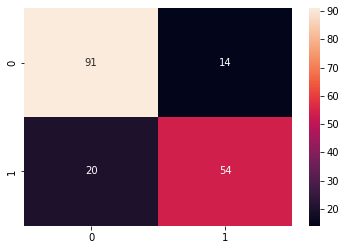

0.8100558659217877
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [205]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot= True , fmt='d')
plt.show()

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [206]:
#Optimizing model's hyperparameters

#### GridSearch

In [207]:
clf2 = RandomForestClassifier(random_state= 42)

max_depth = [6, 8, 10, 12, 14, 16, 18]
min_samples_split = [8, 12, 16, 20, 24]
criterion = ['gini', 'entropy']

grid = dict(max_depth = max_depth, min_samples_split = min_samples_split, criterion = criterion)
grid_search = GridSearchCV(estimator = clf2, param_grid = grid, n_jobs = -1, cv = 5)
grid_search_result = grid_search.fit(X, y)

In [208]:
grid_search_result.best_params_

{'criterion': 'entropy', 'max_depth': 12, 'min_samples_split': 12}

In [209]:
clf_gscv = grid_search_result.best_estimator_

In [210]:
y_pred_gscv = clf_gscv.predict(X_test)

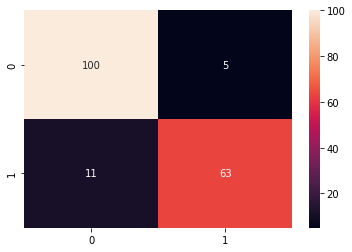

0.9106145251396648
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       105
           1       0.93      0.85      0.89        74

    accuracy                           0.91       179
   macro avg       0.91      0.90      0.91       179
weighted avg       0.91      0.91      0.91       179



In [211]:
sns.heatmap(confusion_matrix(y_test,y_pred_gscv), annot= True , fmt='d')
plt.show()

print(accuracy_score(y_test,y_pred_gscv))
print(classification_report(y_test,y_pred_gscv))

Feature: 0, Score: 0.11353
Feature: 1, Score: 0.33278
Feature: 2, Score: 0.19532
Feature: 3, Score: 0.05345
Feature: 4, Score: 0.04153
Feature: 5, Score: 0.22884
Feature: 6, Score: 0.03453


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


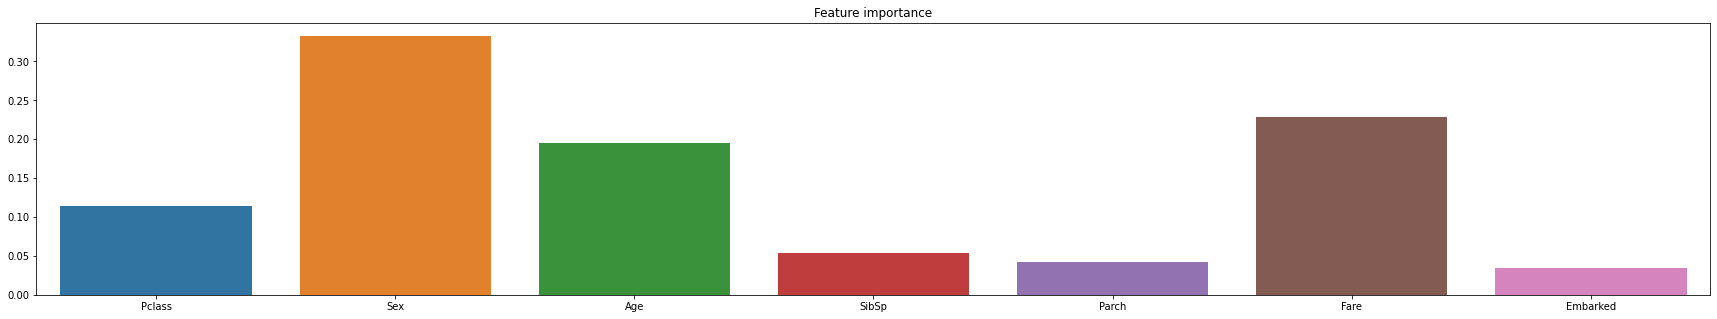

In [212]:
imp_g = clf_gscv.feature_importances_

for i,v in enumerate(imp_g):
	print('Feature: %0d, Score: %.5f' % (i,v))

plt.figure(figsize=(30,5))
columns = X.columns
sns.barplot(columns, imp_g)
plt.title('Feature importance')
plt.show()

#### RandomizedSearch

In [213]:
clf3 = RandomForestClassifier(random_state= 42)

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
criterion = ['gini','entropy']
class_weight = ['balanced', None]

grid_r = dict(n_estimators = n_estimators, max_features = max_features, max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf, bootstrap = bootstrap, criterion = criterion, class_weight = class_weight)
grid_random=RandomizedSearchCV(estimator = clf3, n_iter = 100, cv = 5, random_state = 42, param_distributions = grid_r)
grid_random_result = grid_random.fit(X_train, y_train)

In [214]:
grid_random_result.best_params_

{'n_estimators': 1400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 35,
 'criterion': 'gini',
 'class_weight': None,
 'bootstrap': True}

In [215]:
clf_rscv = grid_random_result.best_estimator_

In [216]:
y_pred_rscv = clf_rscv.predict(X_test)

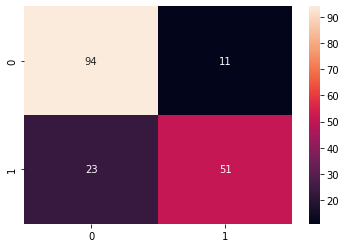

0.8100558659217877
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.82      0.69      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



In [217]:
sns.heatmap(confusion_matrix(y_test,y_pred_rscv), annot= True , fmt='d')
plt.show()

print(accuracy_score(y_test,y_pred_rscv))
print(classification_report(y_test,y_pred_rscv))

Feature: 0, Score: 0.12518
Feature: 1, Score: 0.42179
Feature: 2, Score: 0.14638
Feature: 3, Score: 0.04257
Feature: 4, Score: 0.03142
Feature: 5, Score: 0.19848
Feature: 6, Score: 0.03418


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


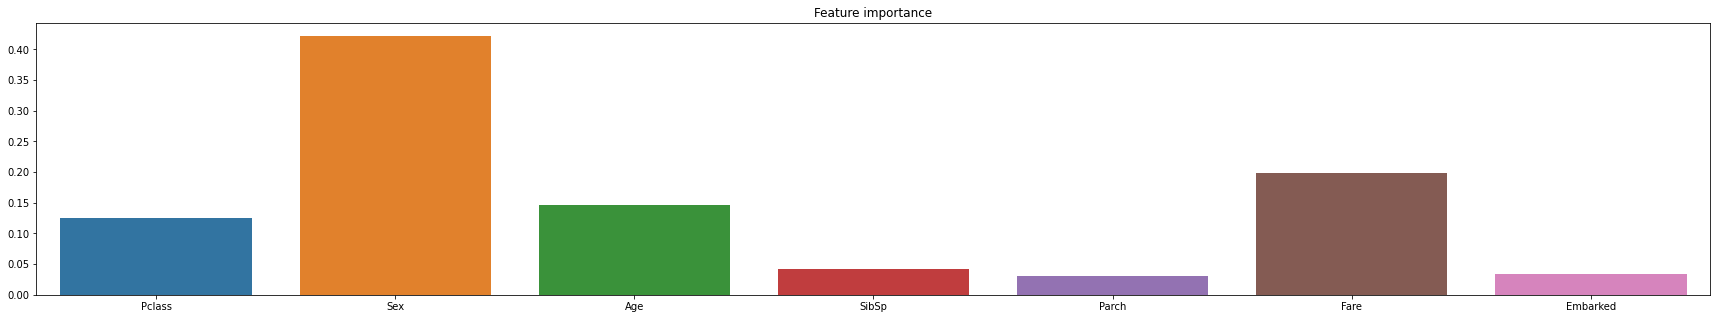

In [218]:
imp_r = clf_rscv.feature_importances_

for i,v in enumerate(imp_r):
	print('Feature: %0d, Score: %.5f' % (i,v))

plt.figure(figsize=(30,5))
columns = X.columns
sns.barplot(columns, imp_r)
plt.title('Feature importance')
plt.show()

In [219]:
# Conclusions: with GridSearch we found a better model rather than with RandomSearch

In [220]:
#Let's save the clf2 model
import pickle

filename = '../models/model_rf_gscv.sav'
pickle.dump(clf2, open(filename, 'wb'))

 ## XGBoost

In [221]:
import xgboost as xgb

In [222]:
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

In [223]:
params = {'objective': 'binary:hinge'} 
steps = 20
clf_xgb = xgb.train(params, D_train, steps)
xgb_pred = clf_xgb.predict(D_test)

In [224]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.83      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

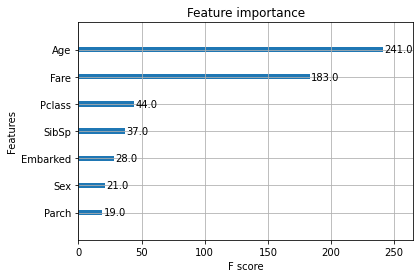

In [225]:
xgb.plot_importance(clf_xgb)

In [226]:
clf_xgb2 = xgb.XGBClassifier()
params_2 = {'eta':[0.10, 0.20, 0.30], 'max_depth':[3, 5, 8, 10, 15], 'min_child_weight':[1, 3, 5], 'gamma':[0.0, 0.2 , 0.4], 'colsample_bytree':[0.3, 0.5, 0.7]}
grid_xgb = GridSearchCV(clf_xgb2, params_2, n_jobs=4, scoring='neg_log_loss', cv=3)

In [227]:
grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=4,
             param_grid={'colsample_bytree': [0.3, 0.5, 0.7],
                         'eta': [0.1, 0.2, 0.3], 'gamma': [0.0, 0.2, 0.4],
                         'max_depth': [3, 5, 8, 10, 15],
                         'min_child_weight': [1, 3, 5]},
             scoring='neg_log_loss')

In [228]:
grid_xgb.best_params_

{'colsample_bytree': 0.5,
 'eta': 0.1,
 'gamma': 0.0,
 'max_depth': 3,
 'min_child_weight': 1}

In [229]:
xgb_2 = grid_xgb.best_estimator_
xgb_2.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False, eta=0.1,
              eval_metric=None, gamma=0.0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.100000001, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, ...)

In [230]:
xgb2_pred = xgb_2.predict(X_test)

In [231]:
print(classification_report(y_test,xgb2_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [232]:
#Save the best model with XGBoost
import pickle

filename = '../models/model_XGB.sav'
pickle.dump(xgb_2, open(filename, 'wb'))